# TAREA 2

# 1. Selección de Dataset

El dataset seleccionado se trata de Adult Income Dataset: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

Este dataset contiene la información de 48842 sujetos que ofrecieron una serie de datos sobre aspectos personales, educativos, sociales y económicos. El objetivo que he propuesto para esta práctica es el de predecir el valor de la variable salario a partir del resto de predictores.

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/adult.csv'
data = pd.read_csv(file_path)

# 2. Análisis Exploratorio de Datos (EDA)

Para cada sujeto se estudian las siguientes 15 características:

* age: edad
* workclass: sector laboral
* fnlwgt: peso final asignado a cada entrada en la muestra de la encuesta
* education: nivel educativo
* educational-num: representación numérica ordenada de los niveles educativos
* marital-status: estado civil
* occupation: puesto de trabajo
* relationship: situación familiar
* race: raza
* gender: género
* capital-gain: ganancia de capital
* capital-loss: pérdida de capital
* hours-per-week: número de horas de trabajo a la semana
* native-country: país de origen
* income: salario

Este dataset presenta variables numéricas y categóricas, además de valores nulos en forma de '?' en las categorías 'workclass', 'occupation' y 'native-country'. Además podemos apreciar un desbalance en la variable objetivo 'income': un 76.07% de los casos gana <=50K, mientras que el 23.93% tiene un salario de >50K.

Por último, estudiaremos la presencia de outliers, datos que presentan una desviación muy significativa respecto a la media del conjunto, es posible que aparezcan debido a errores en la medición del dato y pueden inducir a fallos en las predicciones.

Para la detección de outliers utilizaré Isolation Forest, un algoritmo de detección de anomalías en un conjunto de datos y se basa en la idea de que las observaciones normales tienden a ser más "comunes" y se agrupan, mientras que las anomalías son más infrecuentes y tienden a ser aisladas más rápidamente en el proceso de construcción del bosque de árboles de decisión.

Para la representación gráfica de las columnas en las que se hayan detectado posibles outliers utilizaré gráficas boxplot, que nos permiten ver qué valores se encuentran más alejados de la media y valorar que implican estas anomalías en el conjunto de datos.

Como podemos observar, según el algoritmo IsolationForest, las columnas con presencia de oitliers son age, fnlwgt, educational-num, capital-gain, capital-loss y hours-per-week. A continuación, trataremos cada uno de estos casos:

* age: pese a que haya valores que se distancien de la media, estos datos siguen encontrándose en un rango factible para la vida humana (0 - 100 años), por lo que no considero que esta variable presente outliers.

* fnlwgt y hours-per-week: estas variables presentan valores separados de la media, pero podemos apreciar que estos no se encuentran completamente aislados, es decir, existen otros puntos que también muestran un alejamiento respecto a los valores medios, es por ello que considero que estos valores no se tratan de outliers, sino de una tendencia simplemente menos generalizada.

* capital-gain y capital-loss: sendas columnas presentan algunos valores puntuales muy alejados de la media, sobretodo capital-gain, sin embargo para juzgar la presencia de outliers en estas columnas es necesario entender primero su naturaleza. Estas variables representan la ganancia y pérdida de capital debido a razones extralaborales, por ejemplo se puede ganar mucho dinero invirtiendo en bolsa o se puede perder mucho dinero debido a la ludopatía, sin embargo la mayoría de la población no participa en este tipo de actividades económicas, es por ello que en estas dos columnas la media se encuentra en el valor 0 y tiene sentido que aquellos que sí participan, debido al riesgo que implican, puedan cuantificar valores tan extremos. En conclusión, considero que si eliminasemos estos valores extremos no estaríamos haciendo desaparecer los outliers, sino el propio sentido de la existencia de estas columnas.





DataFrame Structure:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week

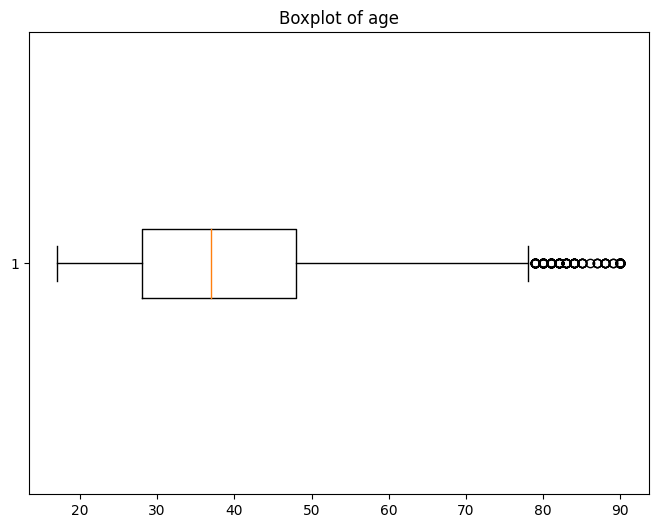

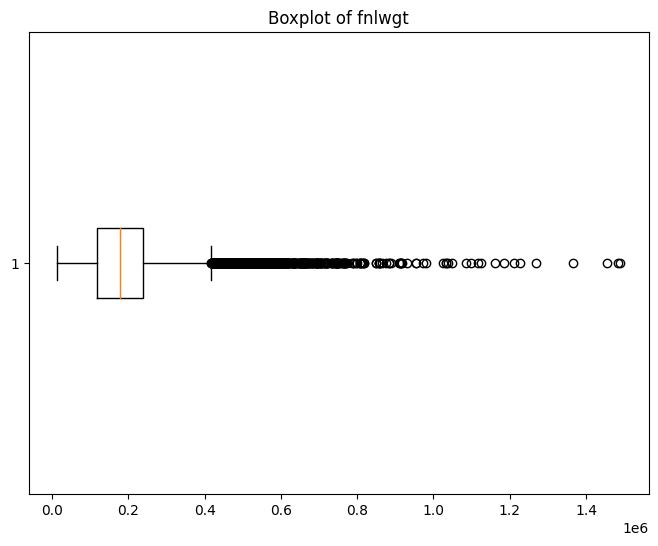

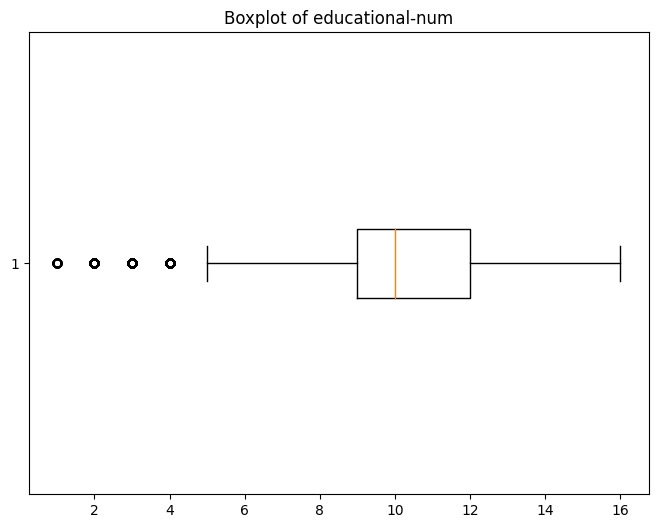

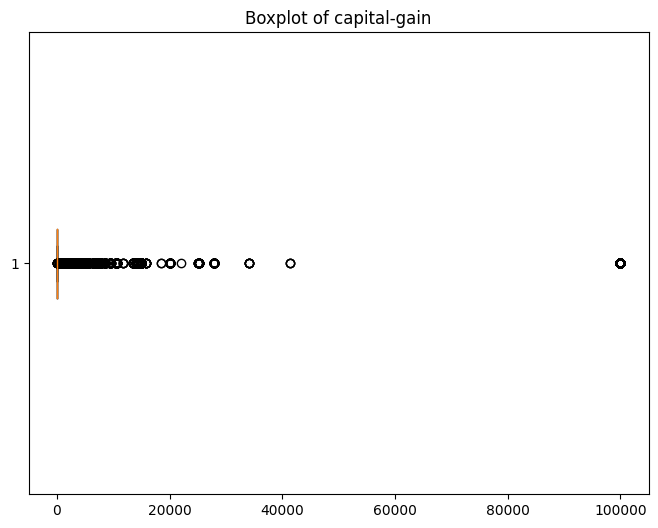

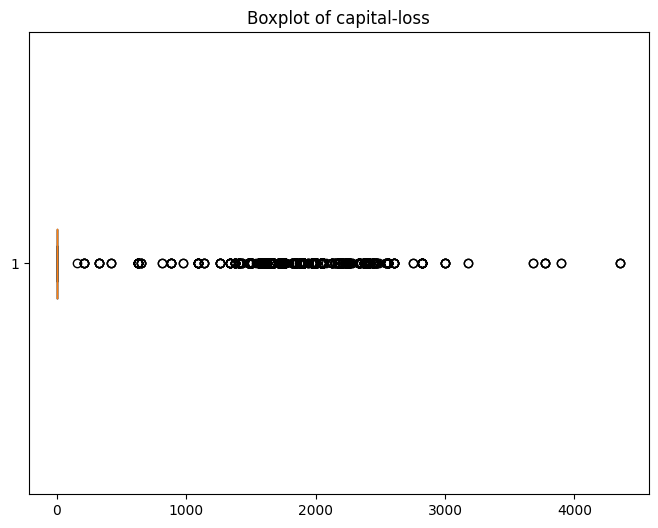

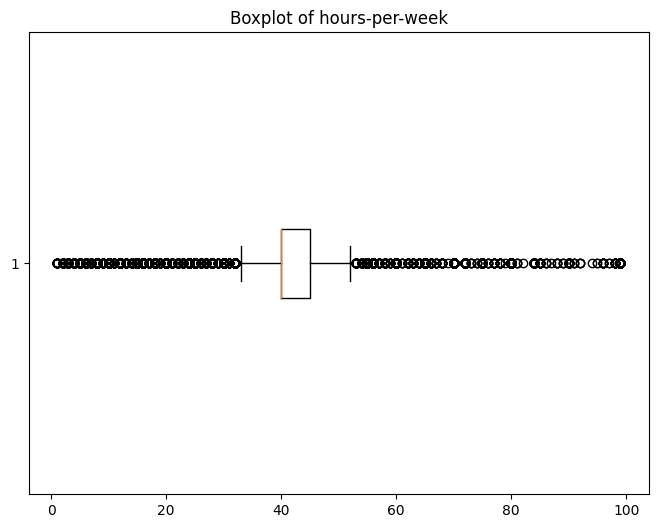

Columns with outliers: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [ ]:
# Displaying the DataFrame structure
print("DataFrame Structure:")
print(data.head())

# 1. Data types of each column
print("1. Data Types:")
print(data.dtypes)

# 2. Column labels
print("\n2. Columns:")
print(data.columns)

# 3. Dimensions of the DataFrame
print("\n3. Shape:")
print(data.shape)

# 4. Index of the DataFrame
print("\n4. Index:")
print(data.index)

# 5. Number of elements in the DataFrame
print("\n5. Size:")
print(data.size)

# 6. Basic information about DataFrame structure
print("\n6. Basic Information about DataFrame:")
print(data.info())

# 7. Summary statistics for numerical columns
print("\n7. Summary Statistics for Numerical Columns:")
print(data.describe())

# 8. Missing values
print("\n8. Checking for Missing Values:")
print(data.isnull().sum())

# 9. Checking for ? values
print("\n9. Number of ? occurrences:")
for column in data.columns:
    question_mark_count = data[column].eq('?').sum()
    print(f'{column}: {question_mark_count}')

# 10. Checking for imbalance in the target variable
percentage_counts = data['income'].value_counts(normalize=True) * 100
print(f'\n10. Percentage of occurrences for each value in the variable income:\n{percentage_counts}')

# 11. Checking four outliers
print('\n11. Visualize columns in a boxplot diagram to check for outliers')

from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Function to detect outliers using Isolation Forest
def detect_outliers_isolation_forest(data, contamination=0.05):
    clf = IsolationForest(contamination=contamination, random_state=42)
    outliers = clf.fit_predict(data.values)
    return outliers == -1

# Visualize boxplots to identify outliers
def visualize_outliers(data, column):
    plt.figure(figsize=(8, 6))
    plt.boxplot(data, vert=False)
    plt.title(f'Boxplot of {column}')
    plt.show()

# Iterate over the columns of the DataFrame
columns_with_outliers = []

for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:

        # Use Isolation Forest to detect outliers
        outliers = detect_outliers_isolation_forest(data[[column]])

        # If there are outliers, add the column to the list
        if outliers.any():
            columns_with_outliers.append(column)

            # Visualize boxplots for the column with outliers
            visualize_outliers(data[[column]], column)

# Show the columns containing outliers
print("Columns with outliers:", columns_with_outliers)

# 3. Preprocesamiento de Datos

En este ejercicio vamos a desarrollar 3 opciones de preprocesamiento de datos, para cada variante se seleccionará un conjunto de técnicas distintas para los siguientes puntos:

* Imputación de valores nulos.
* Transformación de columnas numéricas.
* Codificación de columnas categóricas.
* Reducción de dimensionalidad.

Independientemente de la opción, todas requieren una serie de líneas de código comunes:
* Separación de la variable objetivo del resto de columnas.
* Codificación de la variable objetivo.
* Reemplazar las apariciones del carácter '?' por el símbolo nulo de modo que sea más fácil trabajar con estos datos.
* Identificar las variables numéricas y categóricas de cara a aplicarles los transformadores seleccionados para cada una.
* Crear una función para aplicar los transformadores seleccionados a un dataset específico.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer

# Separate features and target variable
x = data.drop(columns = ['income'], axis=1)
y = data['income']

# LabelBinarizer will assign 0 to the negative class ('<=50K') and 1 to the positive class ('>50K')
label_binarizer = LabelBinarizer()
y_binary = label_binarizer.fit_transform(y)

# y_binary_series contains the labels encoded in binary in a pandas series format
y_binary_series = pd.Series(y_binary.flatten(), index=y.index)

# Identify which columns contains '?' values
columns_with_question_marks = ['workclass', 'occupation', 'native-country']

for column in columns_with_question_marks:
  # Replace "?" with NaN in the column
  x[column] = x[column].replace('?', pd.NA)

# Identify numerical and categorical columns
numerical_cols = x.select_dtypes(include=['int64']).columns
categorical_cols = x.select_dtypes(include=['object']).columns

# Function to apply the selected numerical and categorical transformers to a dataset
def transformColumns(numerical_transformer, categorical_transformer, data):

  # Create a ColumnTransformer
  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numerical_transformer, numerical_cols),
          ('cat', categorical_transformer, categorical_cols)
      ]
  )

  # Create a pipeline
  pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

  # Fit and transform the data
  data_transformed = pipeline.fit_transform(data)

  # Return the transformed dataset
  return data_transformed


## 3.1 Opción 1
La opción 1 sigue la siguiente configuración de preprocesamiento:

* Imputación de valores nulos: sustitución de valores nulos por el valor más común en la columna.

* Transformación de columnas numéricas: StandardScaler permite estandarizar las características numéricas ajustándolas para tener una media de 0 y una desviación estándar de 1. Esto garantiza que todas las categorías se encuentren en una escala comparable.

* Codificación de columnas categóricas: OneHotEncoder permite convertir variables categóricas en un formato numérico asignando a cada categoría un valor binario único, creando así nuevas columnas binarias para cada categoría. Estas columnas indican la presencia o ausencia de la categoría en cada observación, además permite codificar evitando que el modelo asuma erróneamente un orden o relación ordinal entre las categorías.

* Reducción de dimensionalidad: TruncatedSVD, debido a que al usar OneHotEncoder el dataset se convierte matriz dispersa (sparse matrix) por la una gran cantidad de variables categóricas y la cantidad de categorías dentro de esas variables, decidí utilizar TruncatedSVD la cual es una técnica similar a PCA pero diseñada específicamente para matrices dispersas.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD

data1 = x

for column in columns_with_question_marks:

  # Calculate the most common value of the column
  most_common_value = data1[column].mode().iloc[0]

  # Replace NaN with the most common value
  data1[column].fillna(most_common_value, inplace=True)

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the data
data1_transformed = transformColumns(numerical_transformer, categorical_transformer, data)

# Create an instance of TruncatedSVD and especify the number of components
svd = TruncatedSVD(n_components=2)

# Apply TruncatedSVD to standarized and encoded data
data1_svd = svd.fit_transform(data1_transformed)

# Create a dataframe with the result of TruncatedSVD
data1_preprocessed = pd.DataFrame(data=data1_svd, columns=['PC1', 'PC2'])

print(data1_preprocessed)

            PC1       PC2
0      1.521412 -1.626635
1      2.389210  0.471004
2      1.851186  0.102778
3      1.909488  0.652293
4      1.445506 -1.798480
...         ...       ...
48837  1.759505 -0.496606
48838  2.382730  0.067575
48839  1.743717  0.002201
48840  2.088264 -2.178446
48841  1.626073  0.693975

[48842 rows x 2 columns]


## 3.2 Opción 2
La opción 2 sigue la siguiente configuración de preprocesamiento:

* Imputación de valores nules: eliminación de filas con presencia de valores nulos.

* Transformación de columnas numéricas: MinMaxScaler permite ajustar categorías numéricas a un rango específico, generalmente entre 0 y 1, para ello resta el valor mínimo y divide por la diferencia entre el valor máximo y mínimo, por tanto preserva la relación proporcional entre los valores originales.

* Codificación de columnas categóricas: OrdinalEncoder asigna a cada categoría un valor numérico de acuerdo al orden de aparición de la catagería en la columna.

* Reducción de dimensionalidad: PCA transforma un conjunto de datos compuesto por múltiples variables correlacionadas, en un nuevo conjunto de variables no correlacionadas (componentes principales). Estos componentes capturan la mayor parte de la variabilidad de los datos, permitiendo así representar la información de manera más compacta y eficiente. Además de mejorar el rendimiento de los modelos al reducir la magnitud del espacio de características original.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA

data2 = x

data2.dropna()

# Create transformers for numerical and categorical features
numerical_transformer = MinMaxScaler()
categorical_transformer = OrdinalEncoder()


# Fit and transform the data
data2_transformed = transformColumns(numerical_transformer, categorical_transformer, data2)

# Create an instance of PCA and especify the number of components
pca = PCA(n_components=2)

# Apply PCA to standarized and encoded data
data2_pca = pca.fit_transform(data2_transformed)

# Create a dataframe with the result of PCA
data2_preprocessed = pd.DataFrame(data=data2_pca, columns=['PC1', 'PC2'])

print(data2_preprocessed)

            PC1       PC2
0     -0.762593  3.877567
1     -1.639535 -2.179480
2     -1.290926  4.940357
3     -1.925094 -2.069601
4     -1.929589  0.633090
...         ...       ...
48837 -1.270294  6.683308
48838 -1.631548 -0.371112
48839 -1.625096 -5.781032
48840 -1.637795 -5.797856
48841 -1.631484 -3.150698

[48842 rows x 2 columns]


## 3.3 Opción 3
La opción 3 sigue la siguiente configuración de preprocesamiento:

* Imputación de valores nules: sustitución de valores nulos por el valor más común en la columna.

* Transformación de columnas numéricas: MinMaxScaler permite ajustar categorías numéricas a un rango específico, generalmente entre 0 y 1, para ello resta el valor mínimo y divide por la diferencia entre el valor máximo y mínimo, por tanto preserva la relación proporcional entre los valores originales.

* Codificación de columnas categóricas: OrdinalEncoder asigna a cada categoría un valor numérico de acuerdo al orden de aparición de la catagería en la columna.

* Reducción de dimensionalidad: no se ha utilizado ninguna técnica de reducción de dimensionalidad en esta última opción, con el objetivo de realizar una comparación con las anteriores dos opciones en las que sí se ha utilizado alguna técnica.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

data3 = x

for column in columns_with_question_marks:

  # Calculate the most common value of the column
  most_common_value = data3[column].mode().iloc[0]

  # Replace NaN with the most common value
  data3[column].fillna(most_common_value, inplace=True)

# Create transformers for numerical and categorical features
numerical_transformer = MinMaxScaler()
categorical_transformer = OrdinalEncoder()

# Fit and transform the data
data3_preprocessed = transformColumns(numerical_transformer, categorical_transformer, data3)

print(data3_preprocessed)

[[ 0.10958904  0.14512876  0.4        ...  2.          1.
  38.        ]
 [ 0.28767123  0.05245126  0.53333333 ...  4.          1.
  38.        ]
 [ 0.15068493  0.21964867  0.73333333 ...  4.          1.
  38.        ]
 ...
 [ 0.56164384  0.09446153  0.53333333 ...  4.          0.
  38.        ]
 [ 0.06849315  0.12800425  0.53333333 ...  4.          1.
  38.        ]
 [ 0.47945205  0.18648211  0.53333333 ...  4.          0.
  38.        ]]


# 4. Entrenamiento del Modelos

En este apartado se seleccionará la técnica de cross validation y el algoritmo de clasificación que se aplicará a cada una de las opciones anteriores.

En primer lugar dividiremos cada uno de los conjuntos de datos preprocesados en 5 subconjuntos mediante cross-validation, para este fin he decidido utilizar KFold como técnica de cross-validation.

Respecto a la elección del algoritmo para entrenar el modelo, teniendo en cuenta que se trata de un problema de clasificación he decidido utilizar RandomForestClassifier.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Create an instance of KFold technique for 5 subsets
kf = KFold(n_splits=5)

# Create pipeline with the RandomForestClassifier algorithm to train the model
pipeline = Pipeline(steps=[
  ('classifier', RandomForestClassifier())
])

# 5. Evaluación y Comparación

Finalmente para evaluar las distintas opciones de preprocesamiento utilizaremos la función cross_val_score(pipeline, x, y, scoring='f1', cv=kf) que nos permite aplicar el algoritmo del pipeline al conjunto de datos x con el objetivo de predecir y, aplicando como técnica de cross-validation el argumento cv y  utilizando F1 como métrica de evaluación para examinar el rendimiento del modelo.

La puntuación F1 muestra la media entre la precisión y la exhaustividad del modelo, donde la precisión se refiere a la proporción de predicciones positivas correctas entre todas las predicciones positivas, y la exhaustividad se refiere a la proporción de instancias positivas que fueron correctamente identificadas por el modelo entre todas las instancias positivas reales.

Para cada opción se mostrará la puntación F1 de sus 5 subconjuntos de datos, además de la media y desviación estándar de estas 5 puntuaciones.

In [ ]:
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(pipeline, data1_preprocessed, y_binary_series, scoring='f1', cv=kf)

print("Model Evaluation for Option 1:\n")

# Print the F1 Scores for each fold for Option 1
print("F1 Score:")
for i, score in enumerate(scores1, start=1):
    print(f"Fold {i}: {score:.4f}")

# Print the mean and standard deviation of F1 Scores for Option 1
print(f"Mean F1 Score: {scores1.mean():.4f}")
print(f"Standard Deviation: {scores1.std():.4f}")

scores2 = cross_val_score(pipeline, data2_preprocessed, y_binary_series, scoring='f1', cv=kf)

print("\nModel Evaluation for Option 2:\n")

# Print the F1 Scores for each fold for Option 2
print("F1 Score:")
for i, score in enumerate(scores2, start=1):
    print(f"Fold {i}: {score:.4f}")

# Print the mean and standard deviation of F1 Scores for Option 2
print(f"Mean F1 Score: {scores2.mean():.4f}")
print(f"Standard Deviation: {scores2.std():.4f}")

scores3 = cross_val_score(pipeline, data3_preprocessed, y_binary_series, scoring='f1', cv=kf)

print("\nModel Evaluation for Option 3:\n")

# Print the F1 Scores for each fold for Option 3
print("F1 Score:")
for i, score in enumerate(scores3, start=1):
    print(f"Fold {i}: {score:.4f}")

# Print the mean and standard deviation of F1 Scores for Option 3
print(f"Mean F1 Score: {scores3.mean():.4f}")
print(f"Standard Deviation: {scores3.std():.4f}")


Model Evaluation for Option 1:

F1 Score:
Fold 1: 0.5326
Fold 2: 0.5499
Fold 3: 0.5434
Fold 4: 0.5383
Fold 5: 0.5684
Mean F1 Score: 0.5465
Standard Deviation: 0.0123

Model Evaluation for Option 2:

F1 Score:
Fold 1: 0.5525
Fold 2: 0.5484
Fold 3: 0.5459
Fold 4: 0.5627
Fold 5: 0.5689
Mean F1 Score: 0.5557
Standard Deviation: 0.0087

Model Evaluation for Option 3:

F1 Score:
Fold 1: 0.6615
Fold 2: 0.6736
Fold 3: 0.6705
Fold 4: 0.6751
Fold 5: 0.6893
Mean F1 Score: 0.6740
Standard Deviation: 0.0090


En vista de las evaluaciones anteriores, podemos confirmar que la opción 3 es la que ha obtenido un mejor rendimiento en la media de sus 5 subconjuntos, esta opción se diferencia de las otras en no utilizar ninguna técnica de reducción de la dimensionalidad. Esta diferencia de rendimiento puede explicarse debido a que en las opciones 1 y 2, al estar reduciendo las dimensiones a solo dos componentes, estamos perdiendo una gran parte de información que puede servir de mucha utilidad al modelo.

Por otra parte, entre las opciones que sí utilizan reducción de la dimensionalidad resulta difícil afirmar que una de las opciones de preprocesamiento sea mucho mejor que otra, pues las diferencias de rendimiento entre ellas son mínimas. No obstante, cabe destacar que este ejemplo no tiene porque ser extrapolable a otros casos, en los que el uso de técnica de reducción de la dimensionalidad pueden dar lugar a grandes diferencias en las métricas de evaluación.

En cualquiera de los casos el preprocesamiento y la reducción de la dimensionalidad son etapas vitales en el proceso de entrenamiento de un modelo. Mediante el preprocesamiento podemos abordar problemas como valores faltantes y la codificación de variables categóricas para que los algoritmos puedan manejarlos de manera más efectiva.

Mientras que la reducción de dimensionalidad ayuda a acelerar los algoritmos de aprendizaje automático al trabajar con conjuntos de datos más manejables y prevenir el sobreajuste al evitar que los modelos memoricen información poco relevante para su objetivo. Además es clave saber elegir el número correcto de componentes que queremos obtener del algoritmo de reducción de la dimensionalidad, puesto que un número de componentes inadecuadamente bajo puede hacer que el modelo pierda información que le sería de utilidad, mientras que un número excesivamente alto hace que pierda valor el uso de la técnica al no estar eliminando tanta información redundante como sería posible.